<a href="https://colab.research.google.com/github/tzoung-yu/TrueVolume/blob/main/TrueVolume_RT_1%E4%B8%8A%E5%B8%82%E4%B8%8A%E6%AB%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6117 迎廣 上市 電腦及週邊設備業
統計起始日:2023/05/11
[*********************100%%**********************]  1 of 1 completed
realtime done!
2023-10-06
 54.1


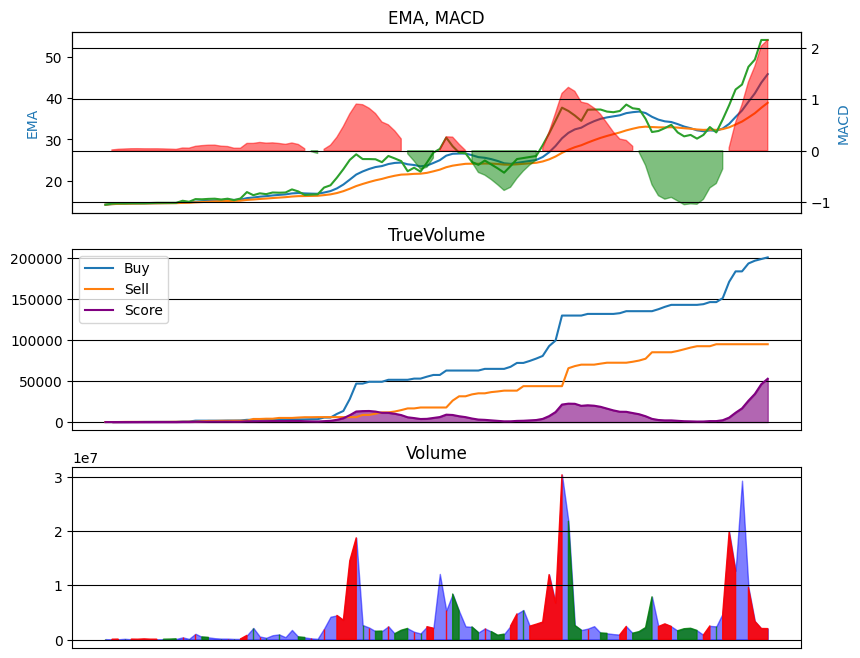

In [ ]:
!pip install twstock
#!twstock -U
import twstock
from twstock import Stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import matplotlib as mpl
import time
import yfinance as yf

#股票代號
stoid="迎廣"

def TrueVol(pd):
  df=pd
  opp=df['Open']
  clo=df['Close']
  voo=df['Volume']
  hig=df['High']
  llo=df['Low']
  upl=[]
  dol=[]
  bll=[]
  upc=0.0
  dlc=0.0
  blc=0.0
  lp=0.0
  lgv=1.0
  lgc=0.0
  upordown=0.0
  xvo=[]
  for i in range(len(opp)):
    if clo[i]>lgc:
      lgc=clo[i]
    if(lp==0.0):
      lp=opp[i]
    upordown=0
    if(clo[i]>=opp[i]):
      if(clo[i] >= opp[i] + ((hig[i] - opp[i])/3.8) and clo[i]>=lp):
        upc+=(voo[i]/1000)
        upordown=1
      else:
        if clo[i]<lp or (clo[i] < opp[i] + ((hig[i] - opp[i])/5)):
          dlc+=(voo[i]/1000)
          upordown=-1
    else:
      if(clo[i] <= opp[i]-((opp[i]-llo[i])/3.8) and clo[i]<=lp):
        dlc+=(voo[i]/1000)
        upordown=-1
      else:
        if(clo[i] >= llo[i]+((hig[i]-llo[i])/2) and clo[i]>lp):
          upc+=(voo[i]/1000)
          upordown=1
    upl.append(upc)
    dol.append(dlc)
    blc+=voo[i]/1000
    bll.append(blc/2)
    xvo.append(upordown)
    lp=clo[i]
    if(voo[i]/1000 > lgv):
      lgv=voo[i]/1000

  ema10=clo.ewm(span=9).mean()
  ema30=clo.ewm(span=26).mean()

  exp12     = clo.ewm(span=12, adjust=False).mean()
  exp26     = clo.ewm(span=26, adjust=False).mean()
  macd      = exp12 - exp26
  signal    = macd.ewm(span=9, adjust=False).mean()
  histogram = macd - signal

  gg1=max(upl[-1], dol[-1])
  bbb=0.0
  sco=[]
  x=[]
  vlv=9999/lgv
  vlc=999/lgc
  vlm=2/max(abs(histogram))
  for i in range(len(upl)):
    bbb=((ema10.iloc[i]-ema30.iloc[i])*vlc*666)+((upl[i]-dol[i])*vlv)
    histo=abs(bbb)*vlm*histogram[i]
    if (bbb>0 and histo>0) or (bbb<0 and histo<0):
      bbb = bbb+histo
    else:
      bbb = bbb+(histo*0.7)
    sco.append(bbb)
    x.append(str(i))
  sco=np.array(sco)
  gg2=max(abs(sco))
  gg3=gg1/gg2
  sco=sco*gg3/3.8

  gg3=gg1/max(abs(histogram))
  histogram2 = histogram*gg3/10

  mpl.rcParams["figure.figsize"] = (9.4, 8)

  ax1 = plt.subplot(311)
  ax2 = ax1.twinx()
  ax1.set_ylabel('EMA', color='tab:blue')
  ax2.set_ylabel('MACD', color='tab:blue')
  ax1.plot(ema10)
  ax1.plot(ema30)
  ax1.plot(clo)
  ax2.fill_between(x, histogram, where=(histogram<0), color='green', alpha=0.5)
  ax2.fill_between(x, histogram, where=(histogram>0), color='red', alpha=0.5)
  plt.title('EMA, MACD')
  plt.gca().xaxis.set_ticks([])
  plt.grid(color='black')

  plt.subplot(312)
  plt.plot(upl,label='Buy')
  plt.plot(dol,label='Sell')
  plt.gca().xaxis.set_ticks([])
  plt.fill_between(x, sco, where=(sco>0), color='purple', alpha=0.6)
  plt.fill_between(x, sco, where=(sco<0), color='purple', alpha=0.4)
  #plt.fill_between(x, histogram2, where=(histogram2<0), color='green', alpha=0.6)
  #plt.fill_between(x, histogram2, where=(histogram2>0), color='red', alpha=0.6)
  plt.plot(sco, label='Score', color='purple')
  #plt.bar(x, height=sco, color='red','linewidth=0)
  plt.grid(color='black')
  plt.legend()
  plt.title('TrueVolume')

  xvo = np.array(xvo)
  plt.subplot(313)
  plt.title('Volume')
  #plt.plot(voo)
  plt.fill_between(x, voo, where=(voo>0), color='blue', alpha=0.5)
  plt.fill_between(x, voo, where=(xvo<0), color='green', alpha=0.8)
  plt.fill_between(x, voo, where=(xvo>0), color='red', alpha=0.9)
  plt.gca().xaxis.set_ticks([])
  plt.grid(color='black')

  plt.show()

def keep_first_line(text):
    lines = text.splitlines()
    if lines:
        return lines[0]
    else:
        return ""

thisday = datetime.today()
day_start = thisday - timedelta(days=150)
#day_start = thisday.replace(month=1, day=1)

codes = twstock.codes
df = pd.DataFrame.from_dict(codes, orient='index')

stoname=str(stoid)
if not stoname.isdigit():
  nn = df[df["name"] == stoname]
  stoid=str(nn.code[0])

nn=df[df["code"]==stoid]
print(stoid, nn.name[0], nn.market[0],nn.group[0])

# 讀取股價資料
if(nn.market[0]=='上櫃'):
  print("統計起始日:"+day_start.strftime("%Y/%m"))
  stock = Stock(stoid)
  sto_price = stock.fetch_from(day_start.year, day_start.month)
  sto_attr = ['Date', 'Volume', 'Turnover', 'Open', 'High', 'Low', 'Close', 'Change', 'Transaction']
  data1 = pd.DataFrame(columns = sto_attr, data = sto_price)
  data1 = data1.drop(['Turnover', 'Change', 'Transaction'], axis=1)

if(nn.market[0]=='上市'):
  print("統計起始日:"+day_start.strftime("%Y/%m/%d"))
  data1 = yf.download(stoid+'.TW',start=day_start, end=thisday)
  data1 = data1.drop(['Adj Close'], axis=1)
  data1 = data1.reset_index(drop=False)

twstock.realtime.mock = False
realdone = False
while(realdone == False):
  data2 = twstock.realtime.get(stoid)
  if data2['success']:
    dfl=data1.tail(1)
    tt1=str(dfl['Date'])
    tt1= tt1[5:]
    tt1 = tt1[:10]
    rtime=data2['info']['time']
    rtv=data2['realtime']['accumulate_trade_volume']
    ropen=data2['realtime']['open']
    rhigh=data2['realtime']['high']
    rlow=data2['realtime']['low']
    rlp=data2['realtime']['latest_trade_price']
    tt2=rtime[:10]
    if rlp != '-':
      if (tt2 != tt1):
        if(nn.market[0]=='上櫃'):
          data1.loc[len(data1)] = [tt2, int(rtv)*1000, float(ropen),float(rhigh),float(rlow),float(rlp)]
        if(nn.market[0]=='上市'):
          data1.loc[len(data1)] = [tt2, float(ropen),float(rhigh),float(rlow),float(rlp), int(rtv)*1000]
        #print(data1.tail(1))
      print("realtime done!")
      realdone = True
    else:
      print(rlp)
  if realdone==False:
    time.sleep(10)

df=data1.tail(1)
tt1=str(df["Date"])
tt1= keep_first_line(tt1)
print(tt1[-10:])
tt1=str(round(df["Close"],2))
tt1= keep_first_line(tt1)
print(tt1[6:])

TrueVol(data1)